In [22]:
import pandas as pd
import urllib.request
import urllib.parse
import re
import requests
from bs4 import BeautifulSoup

from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import matplotlib

AlphaVantage_key = 'I9Z0TRYDB0P8IZUM'


In [3]:
# S&P by sector

sector_names = [
    "S&P 500 Consumer Discretionary Sector",
    "S&P 500 Consumer Staples Sector",
    "S&P 500 Energy Sector",
    "S&P 500 Financial Sector",
    "S&P 500 Healthcare Sector",
    "S&P 500 Industrial Sector",
    "S&P 500 Materials Sector",
    "S&P 500 Real Estate Sector",
    "S&P 500 Technology Sector",
    "S&P 500 Telecom Sector",
    "S&P 500 Utilities Sector",

]
sector_list = [
    "http://investsnips.com/consumer-discretionary-stocks-in-the-sp-500-index/",
    "http://investsnips.com/consumer-staples-companies-in-the-sp-500-index/",
    "http://investsnips.com/energy-stocks-in-the-sp-500-index/",
    "http://investsnips.com/financial-sector-stocks-in-the-sp-500-index/",
    "http://investsnips.com/healthcare-stocks-in-the-sp-500-index/",
    "http://investsnips.com/industrial-sector-stocks-in-the-sp-500-index/",
    "http://investsnips.com/materials-sector-stocks-in-the-sp-500-index/",
    "http://investsnips.com/real-estate-stocks-in-the-sp-500-index/",
    "http://investsnips.com/technology-stocks-in-the-sp-500-index/",
    "http://investsnips.com/telecommunication-stocks-in-the-sp-500-index/",
    "http://investsnips.com/utilities-in-the-sp-500-index/",
]

SP500_ETF = "http://investsnips.com/list-of-etfs-focusing-on-the-sp-500/"

# S&P by Industry
industry_names = [
    "ConsumerDiscretionary",
    "ConsumerStaples",
    "Energy",
    "Financial",
    "Healthcare",
    "Industrials",
    "Materials",
    "RealEstate",
    "Technology",
    "Telecom",
    "Utilities",
    "AdvertisingandMarketing",
    "Aerospace&Defense",
    "Airlines",
    "Automotive",
    "Banks",
    "BeautyProducts",
    "BiotechandPharmaceuticals",
    "CapitalMarkets",
    "Chemicals",
    "Clothing&Shoes",
    "ConsumerFinance",
    "ConstructionMaterials",
    "ContainersandPackaging",
    "Data&Analytics",
    "DrugStores",
    "Food&Beverage",
    "GroceryStores",
    "HealthcareDistributors",
    "HealthcareFacilities",
    "Hotels",
    "Insurance",
    "Internet",
    "Media",
    "MedicalDevices",
    "MetalsandMining",
    "Oil&GasDownstreamandMidstream",
    "Oil&GasEquipment&Services",
    "Oil&GasExploration&Production",
    "Railroads",
    "Restaurants",
    "RetailStores",
    "Semiconductors",
    "SinStocks",
    "Software",
    "Toy&Games",
    "Transportation",
    "Travel&Tourism",
    "WasteServices",
]

industry_list = [
        "http://investsnips.com/consumer-discretionary-stocks-in-the-sp-500-index/",
    "http://investsnips.com/consumer-staples-companies-in-the-sp-500-index/",
    "http://investsnips.com/energy-stocks-in-the-sp-500-index/",
    "http://investsnips.com/financial-sector-stocks-in-the-sp-500-index/",
    "http://investsnips.com/healthcare-stocks-in-the-sp-500-index/",
    "http://investsnips.com/industrial-sector-stocks-in-the-sp-500-index/",
    "http://investsnips.com/materials-sector-stocks-in-the-sp-500-index/",
    "http://investsnips.com/real-estate-stocks-in-the-sp-500-index/",
    "http://investsnips.com/technology-stocks-in-the-sp-500-index/",
    "http://investsnips.com/telecommunication-stocks-in-the-sp-500-index/",
    "http://investsnips.com/utilities-in-the-sp-500-index/",
    "http://investsnips.com/advertising-and-marketing-stocks-in-the-sp-500-index/",
    "http://investsnips.com/aerospace-defense-stocks-in-the-sp-500-index/",
    "http://investsnips.com/airline-stocks-in-the-sp-500-index/",
    "http://investsnips.com/automotive-stocks-in-the-sp-500-index/",
    "http://investsnips.com/banking-stocks-in-the-sp-500-index/",
    "http://investsnips.com/beauty-product-stocks-in-the-sp-500-index/",
    "http://investsnips.com/biotech-and-pharmaceutical-stocks-in-the-sp-500-index/",
    "http://investsnips.com/capital-market-stocks-in-the-sp-500-index/",
    "http://investsnips.com/chemical-stocks-in-the-sp-500-index/",
    "http://investsnips.com/clothing-and-footwear-stocks-in-the-sp-500-index/",
    "http://investsnips.com/consumer-finance-stocks-in-the-sp-500-index/",
    "http://investsnips.com/construction-materials-stocks-in-the-sp-500-index/",
    "http://investsnips.com/containers-and-packaging-stocks-in-the-sp-500-index/",
    "http://investsnips.com/data-and-analytic-stocks-in-the-sp-500-index/",
    "http://investsnips.com/drug-store-stocks-in-the-sp-500-index/",
    "http://investsnips.com/food-beverage-stocks-in-the-sp-500-index/",
    "http://investsnips.com/grocery-stores-stocks-in-the-sp-500-index/",
    "http://investsnips.com/healthcare-distributors-in-the-sp-500-index/",
    "http://investsnips.com/healthcare-facility-stocks-in-the-sp-500-index/",
    "http://investsnips.com/hotel-stocks-in-the-sp-500-index/",
    "http://investsnips.com/insurance-stocks-in-the-sp-500-index/",
    "http://investsnips.com/internet-stocks-in-the-sp-500-index/",
    "http://investsnips.com/media-stocks-in-the-sp-500-index/",
    "http://investsnips.com/medical-device-and-equipment-stocks-in-the-sp-500-index/",
    "http://investsnips.com/metals-and-mining-stocks-in-the-sp-500-index/",
    "http://investsnips.com/oil-gas-downstream-and-midstream-stocks-in-the-sp-500-index/",
    "http://investsnips.com/energy-equipment-and-services-stocks-in-the-sp-500-index/",
    "http://investsnips.com/oil-gas-exploration-and-production-stocks-in-the-sp-500-index/",
    "http://investsnips.com/railroad-stocks-in-the-sp-500-index/",
    "http://investsnips.com/restaurant-stocks-in-the-sp-500-index/",
    "http://investsnips.com/retail-stores-in-the-sp-500-index/",
    "http://investsnips.com/semiconductor-stocks-in-the-sp-500-index/",
    "http://investsnips.com/sin-stocks-in-the-sp-500-index/",
    "http://investsnips.com/software-stocks-in-the-sp-500-index/",
    "http://investsnips.com/toys-and-games-stocks-in-the-sp-500-index/",
    "http://investsnips.com/transportation-stocks-in-the-sp-500-index/",
    "http://investsnips.com/travel-and-tourism-stocks-in-the-sp-500-index/",
    "http://investsnips.com/waste-service-stocks-in-the-sp-500-index/",
]

In [14]:
stock_list = []
stock_sector_dict = {}
company_desc_dict = {}

In [19]:
for i in range(len(sector_list)):
    data = requests.get(sector_list[i])
    soup = BeautifulSoup(data.text, 'html.parser')
    
    for p in soup.find_all('p'):
        for a in p.find_all('a'):
            matchObj = re.match( r'(.*)\(([A-Z]+)\)', a.text, re.M|re.I)
            if matchObj:
                company_name = matchObj.group(1)
                stock_ticker = matchObj.group(2)
                company_desc = a.next_sibling
                
                stock_list.append(stock_ticker)
                company_desc_dict[stock_ticker] = company_desc
                
                if sector_names[i] not in stock_sector_dict:
                    stock_sector_dict[sector_names[i]] = [stock_ticker]
                else:
                    stock_sector_dict[sector_names[i]].append(stock_ticker)
                


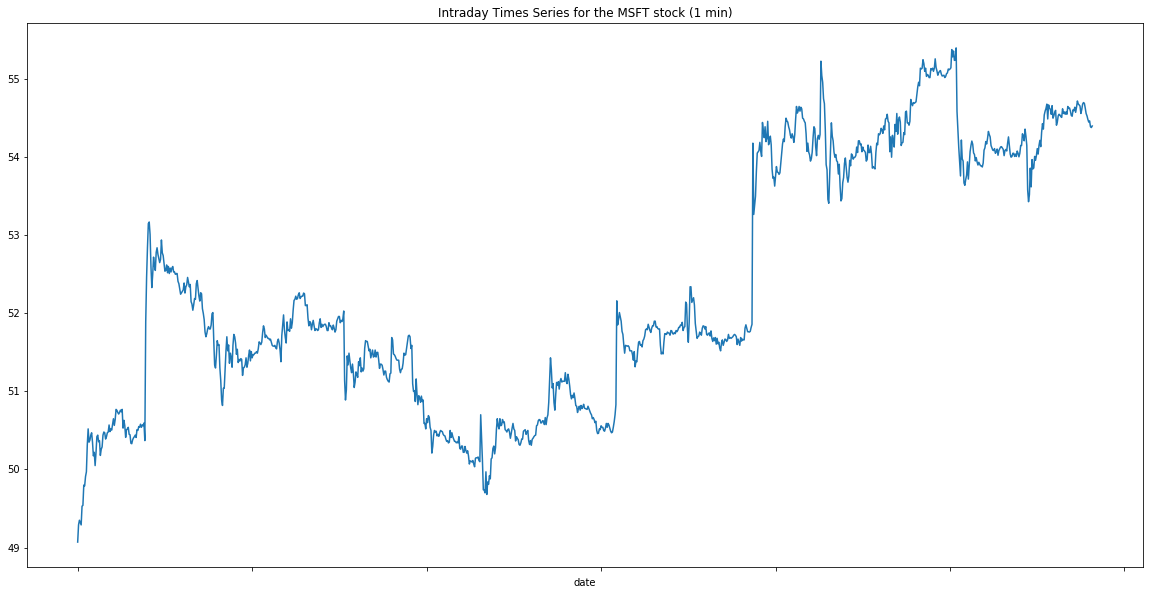

In [28]:
ts = TimeSeries(key = AlphaVantage_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='WDC',interval='5min', outputsize='full')
plt.figure(figsize=(20,10))
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')

plt.show()

In [29]:
data.tail(100)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-04-22 14:15:00,54.0855,54.1413,54.0800,54.1000,22186.0
2019-04-22 14:20:00,54.1100,54.1300,54.0500,54.0800,36271.0
2019-04-22 14:25:00,54.0800,54.1800,54.0500,54.1800,41151.0
2019-04-22 14:30:00,54.1900,54.3100,54.1900,54.2600,50125.0
2019-04-22 14:35:00,54.2600,54.2650,54.1250,54.1450,29485.0
2019-04-22 14:40:00,54.1500,54.1699,54.0236,54.0400,52864.0
2019-04-22 14:45:00,54.0450,54.1000,53.9900,54.0000,35796.0
2019-04-22 14:50:00,54.0050,54.0600,54.0000,54.0100,29947.0
2019-04-22 14:55:00,54.0100,54.0700,53.9800,54.0500,27551.0


In [37]:
import sqlite3
import os

{'ticker': 'WDC', 'date': '2019-04-02 09:35:00', 'open': 49.24, 'high': 49.29, 'low': 48.89, 'close': 49.07, 'volume': 126209.0}
{'ticker': 'WDC', 'date': '2019-04-02 09:40:00', 'open': 49.02, 'high': 49.45, 'low': 49.02, 'close': 49.29, 'volume': 52263.0}
{'ticker': 'WDC', 'date': '2019-04-02 09:45:00', 'open': 49.24, 'high': 49.4, 'low': 49.176, 'close': 49.35, 'volume': 33777.0}
{'ticker': 'WDC', 'date': '2019-04-02 09:50:00', 'open': 49.39, 'high': 49.46, 'low': 49.31, 'close': 49.32, 'volume': 64466.0}
{'ticker': 'WDC', 'date': '2019-04-02 09:55:00', 'open': 49.32, 'high': 49.45, 'low': 49.29, 'close': 49.29, 'volume': 41976.0}
{'ticker': 'WDC', 'date': '2019-04-02 10:00:00', 'open': 49.33, 'high': 49.53, 'low': 49.33, 'close': 49.53, 'volume': 74763.0}
{'ticker': 'WDC', 'date': '2019-04-02 10:05:00', 'open': 49.51, 'high': 49.54, 'low': 49.41, 'close': 49.54, 'volume': 61858.0}
{'ticker': 'WDC', 'date': '2019-04-02 10:10:00', 'open': 49.53, 'high': 49.84, 'low': 49.53, 'close': 4

In [64]:
conn = sqlite3.connect(os.path.expanduser("~/Desktop/Alpha Vantage/db/5min.db"))
c = conn.cursor()

# c.execute("""CREATE TABLE Price_5min(
#     ticker text,
#     date text,
#     open real,
#     high real,
#     low real,
#     close real,
#     volume real
# )""")

mydict = {}
for row in data.iterrows():
    index, info = row
    temp = info.tolist()
    mydict['ticker'] = 'WDC'
    mydict['date'] = index
    mydict['open'] = temp[0]
    mydict['high'] = temp[1]
    mydict['low'] = temp[2]
    mydict['close'] = temp[3]
    mydict['volume'] = temp[4]     

    c.execute("INSERT INTO Price_5min VALUES (:ticker, :date, :open, :high, :low, :close, :volume)", mydict)

c.execute("SELECT * FROM Price_5min WHERE ticker='WDC'")

print(c.fetchall())

conn.commit()
conn.close()

7
[('WDC', '2019-04-02 09:35:00', 49.24, 49.29, 48.89, 49.07, 126209.0), ('WDC', '2019-04-02 09:40:00', 49.02, 49.45, 49.02, 49.29, 52263.0), ('WDC', '2019-04-02 09:45:00', 49.24, 49.4, 49.176, 49.35, 33777.0), ('WDC', '2019-04-02 09:50:00', 49.39, 49.46, 49.31, 49.32, 64466.0), ('WDC', '2019-04-02 09:55:00', 49.32, 49.45, 49.29, 49.29, 41976.0), ('WDC', '2019-04-02 10:00:00', 49.33, 49.53, 49.33, 49.53, 74763.0), ('WDC', '2019-04-02 10:05:00', 49.51, 49.54, 49.41, 49.54, 61858.0), ('WDC', '2019-04-02 10:10:00', 49.53, 49.84, 49.53, 49.8, 94983.0), ('WDC', '2019-04-02 10:15:00', 49.79, 49.81, 49.59, 49.79, 85940.0), ('WDC', '2019-04-02 10:20:00', 49.83, 49.95, 49.81, 49.91, 64113.0), ('WDC', '2019-04-02 10:25:00', 49.87, 49.985, 49.85, 49.97, 54351.0), ('WDC', '2019-04-02 10:30:00', 49.93, 50.315, 49.93, 50.31, 266165.0), ('WDC', '2019-04-02 10:35:00', 50.33, 50.64, 50.31, 50.52, 390712.0), ('WDC', '2019-04-02 10:40:00', 50.52, 50.62, 50.34, 50.35, 271329.0), ('WDC', '2019-04-02 10:45:

7
